In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
df_athlete = pd.read_csv('athlete_events.csv')
df_regions = pd.read_csv('noc_regions.csv')

In [6]:
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
df_athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
df_athlete.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

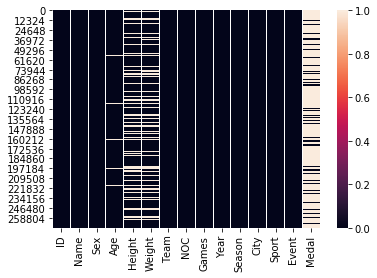

In [12]:
sns.heatmap(data=df_athlete.isna())

In [7]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [13]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [14]:
df_regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,PER,Germany,South Yemen
freq,1,4,1


In [18]:
df_regions.isna().any()

NOC       False
region     True
notes      True
dtype: bool

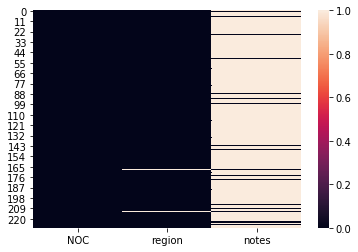

In [20]:
sns.heatmap(data=df_regions.isna())

In [21]:
merge_2DF = pd.merge(df_athlete, df_regions, how='left', on = 'NOC')

In [22]:
merge_2DF

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [25]:
merge_2DF.info()
merge_2DF.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


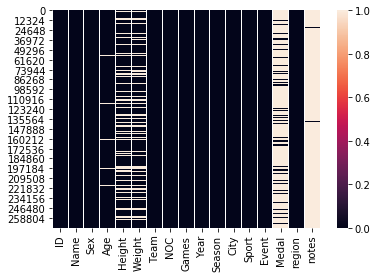

In [26]:
sns.heatmap(data=merge_2DF.isna())

In [205]:
merge_2DF_1=merge_2DF[(merge_2DF['Medal']=='Gold') | (merge_2DF['Medal']=='Silver') | (merge_2DF['Medal']=='Bronze')]

In [206]:
merge_2DF_1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,,
1900,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
1920,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
1920,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
2014,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
1952,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN


In [54]:
merge_2DF_1.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [55]:
merge_2DF_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 1900 to 2004
Data columns (total 17 columns):
ID        39783 non-null int64
Name      39783 non-null object
Sex       39783 non-null object
Age       39051 non-null float64
Height    31072 non-null float64
Weight    30456 non-null float64
Team      39783 non-null object
NOC       39783 non-null object
Games     39783 non-null object
Year      39783 non-null int64
Season    39783 non-null object
City      39783 non-null object
Sport     39783 non-null object
Event     39783 non-null object
Medal     39783 non-null object
region    39774 non-null object
notes     545 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 5.5+ MB


In [89]:
merge_2DF_1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Ones,Medal_1
Year,,,,,,,,,,,,,,,,,,,
1900,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1,1
1920,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0
1920,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0
2014,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,1,0
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,1,1
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,1,1
1948,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,1,1
1952,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN,1,0


In [209]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(merge_2DF_1['Medal'])
merge_2DF_1['Medal_1'] = le.transform(merge_2DF_1['Medal'])
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Bronze': 0, 'Gold': 1, 'Silver': 2}


C:\Users\Igor Kolesnikov\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


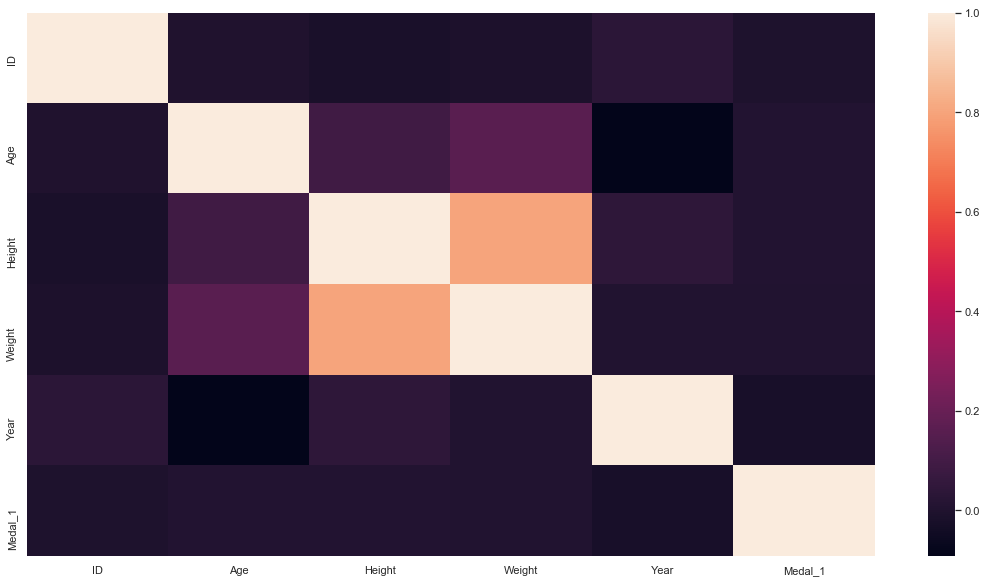

In [210]:
sns.heatmap(merge_2DF_1.corr())

In [ ]:
#Exploring counts

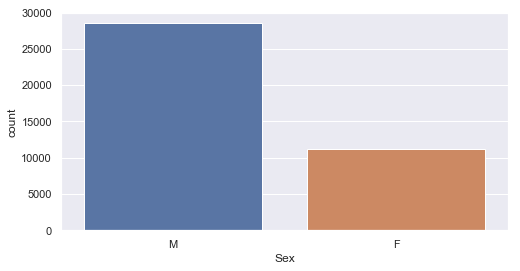

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot("Sex", data=merge_2DF_1)

In [82]:
merge_2DF_1[merge_2DF_1['Sex']=='M']['Medal'].count()

28530

In [83]:
merge_2DF_1[merge_2DF_1['Sex']=='F']['Medal'].count()

11253

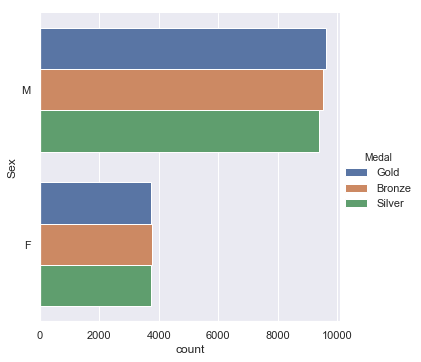

In [97]:
sns.catplot(y="Sex",hue="Medal", data=merge_2DF_1, kind="count")

In [108]:
GM=merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Gold')]['Medal'].count()
print('Count of (Male) Gold medals-',GM)

Count of (Male) Gold medals- 9625


In [109]:
SM=merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Silver')]['Medal'].count()
print('Count of (Male) Silver medals-',SM)

Count of (Male) Silver medals- 9381


In [110]:
BM=merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Bronze')]['Medal'].count()
print('Count of (Male) Bronze medals-',BM)

Count of (Male) Bronze medals- 9524


In [111]:
GM=merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Gold')]['Medal'].count()
print('Count of (Female) Gold medals-',GM)

Count of (Female) Gold medals- 3747


In [112]:
SM=merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Silver')]['Medal'].count()
print('Count of (Female) Silver medals-',SM)

Count of (Male) Silver medals- 3735


In [113]:
BM=merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Bronze')]['Medal'].count()
print('Count of (Female) Bronze medals-',BM)

Count of (Female) Bronze medals- 3771


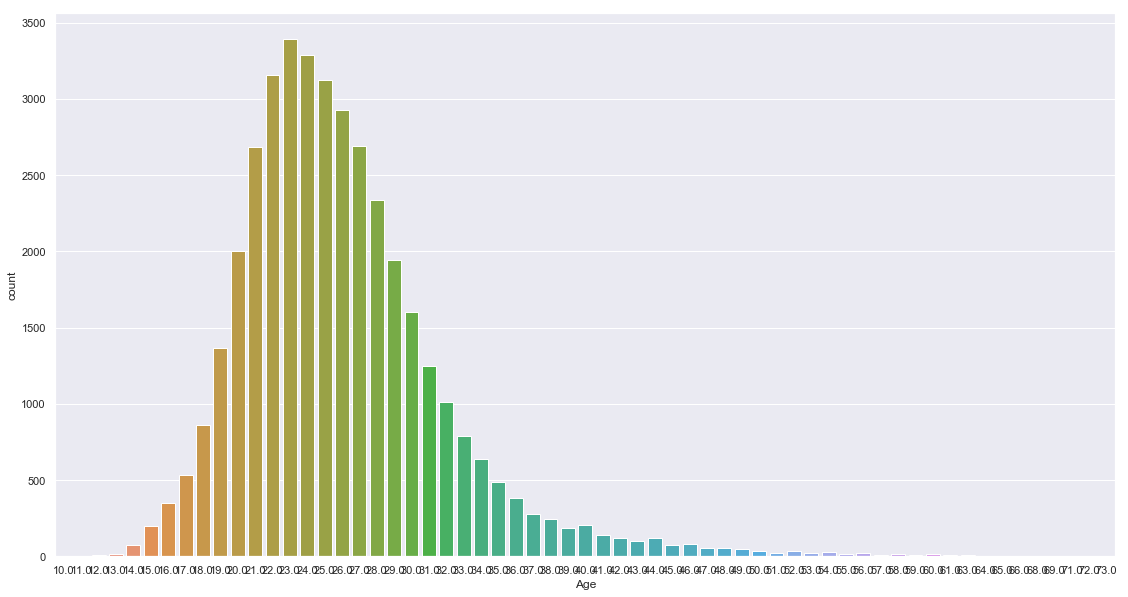

In [181]:
#Exploring Ages

import seaborn as sns
sns.set(rc={'figure.figsize':(19,10)})
sns.countplot(merge_2DF_1['Age'])

In [ ]:
# age of medalists (Male)

Mean age of gold medalists- 26.50464135021097
Median age of gold medalists- 25.0


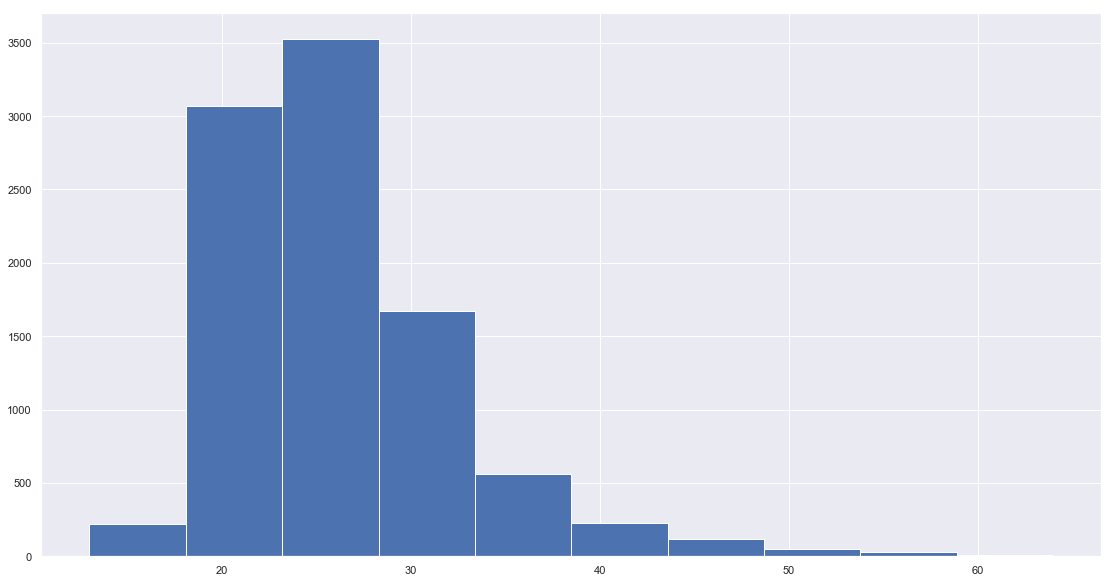

In [127]:
A_GM=merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Gold')]['Age'].hist()
print('Mean age of gold medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Gold')]['Age'].mean())
print('Median age of gold medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Gold')]['Age'].median())

Mean age of silver medalists- 26.633194016717994
Median age of silver medalists- 26.0


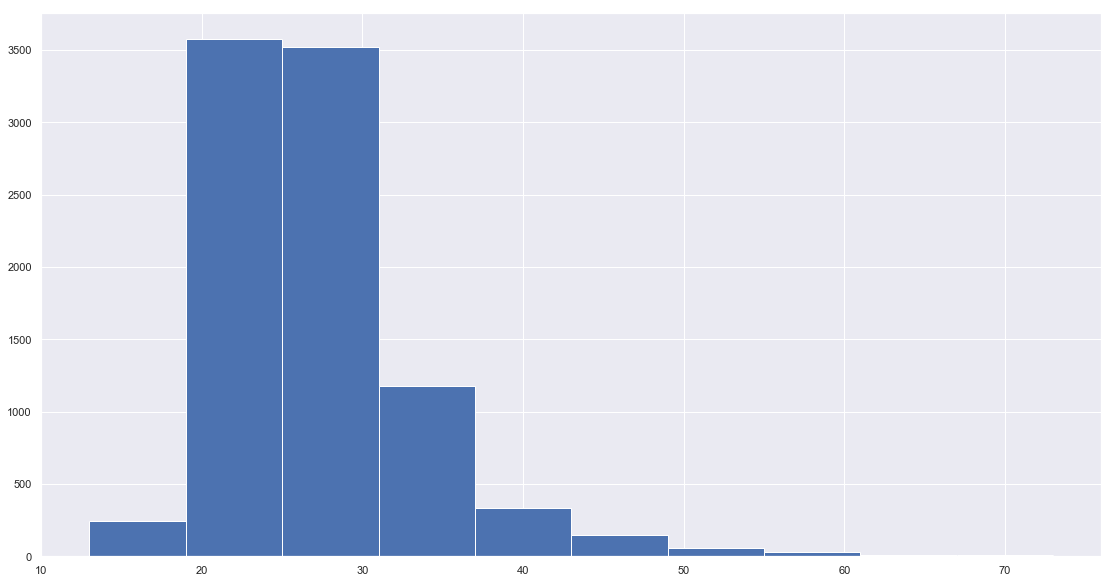

In [124]:
A_GM=merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Silver')]['Age'].hist()
print('Mean age of silver medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Silver')]['Age'].mean())
print('Median age of silver medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Silver')]['Age'].median())

Mean age of bronze medalists- 26.35572865952613
Median age of bronze medalists- 25.0


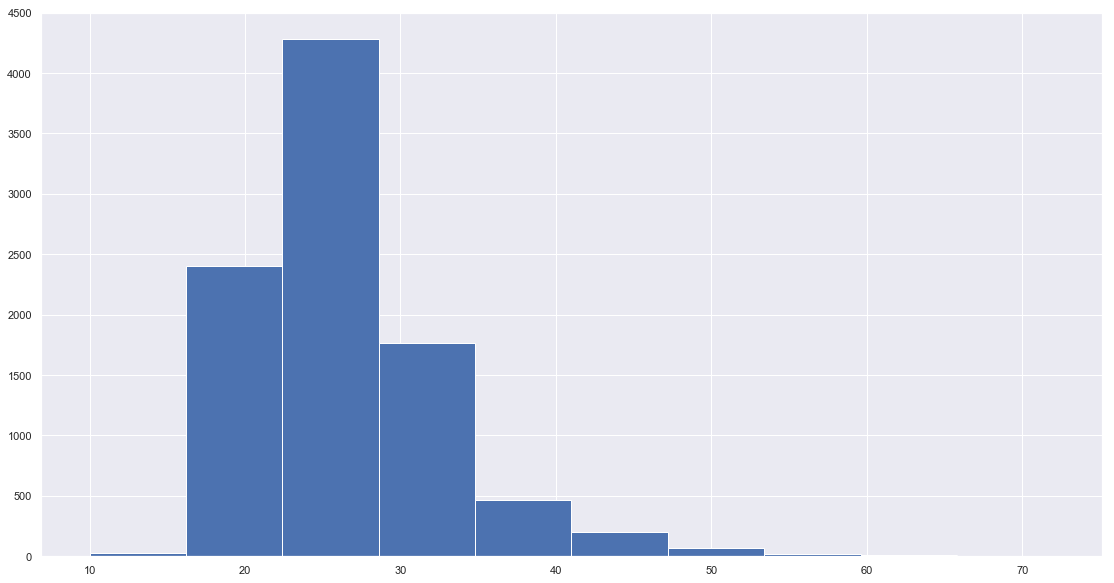

In [125]:
A_GM=merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Bronze')]['Age'].hist()
print('Mean age of bronze medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Bronze')]['Age'].mean())
print('Median age of bronze medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='M') & (merge_2DF_1['Medal']=='Bronze')]['Age'].median())

In [ ]:
# age of  medalists (Female)

Mean age of gold medalists- 24.372596153846153
Median age of gold medalists- 24.0


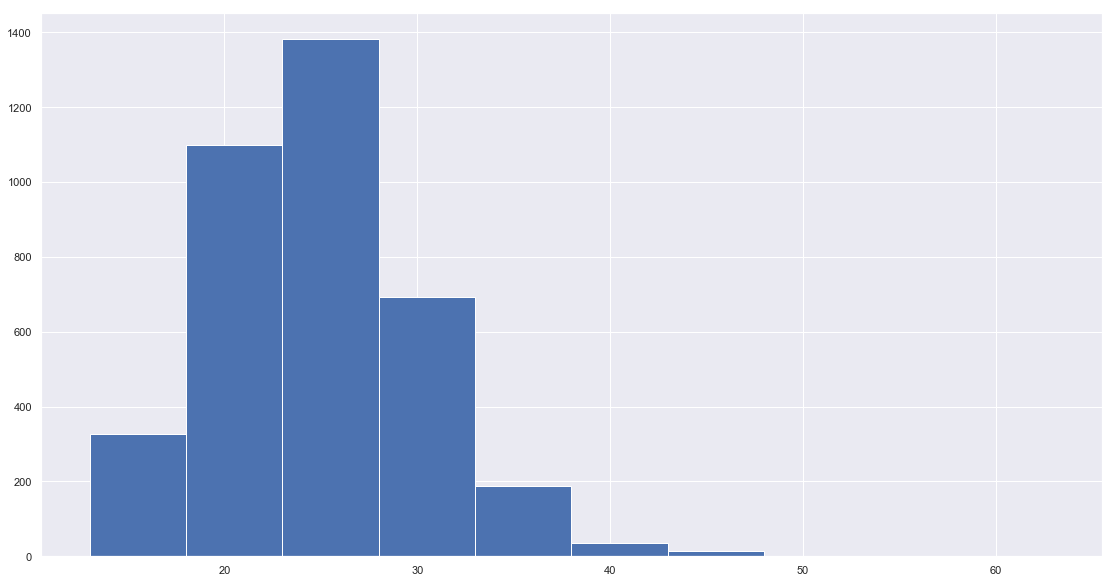

In [129]:
A_GM=merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Gold')]['Age'].hist()
print('Mean age of gold medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Gold')]['Age'].mean())
print('Median age of gold medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Gold')]['Age'].median())

Mean age of silver medalists- 24.444891391794048
Median age of silver medalists- 24.0


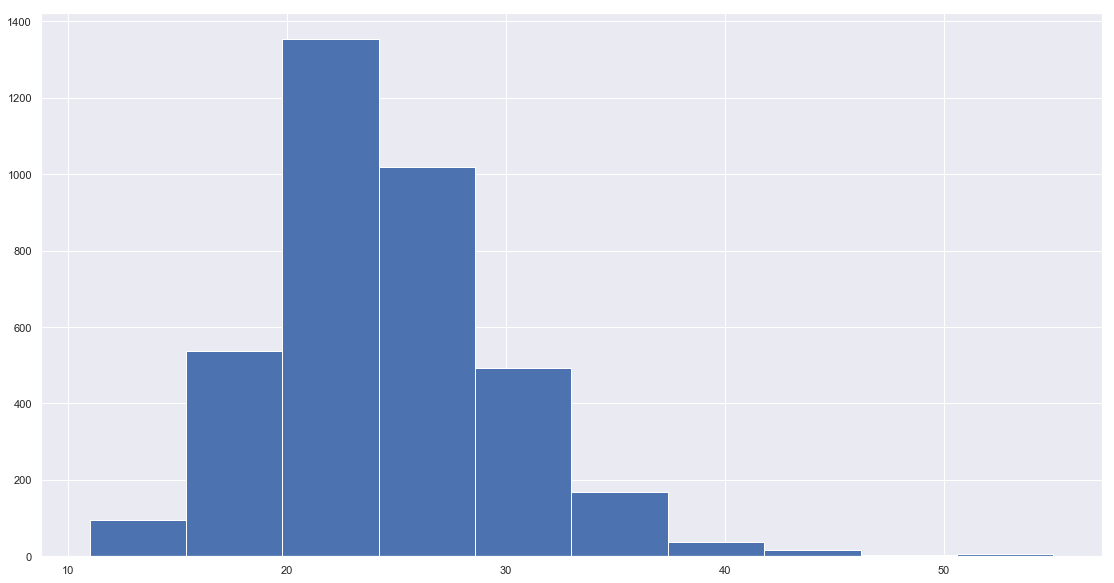

In [130]:
A_GM=merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Silver')]['Age'].hist()
print('Mean age of silver medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Silver')]['Age'].mean())
print('Median age of silver medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Silver')]['Age'].median())

Mean age of bronze medalists- 24.708743024182834
Median age of bronze medalists- 24.0


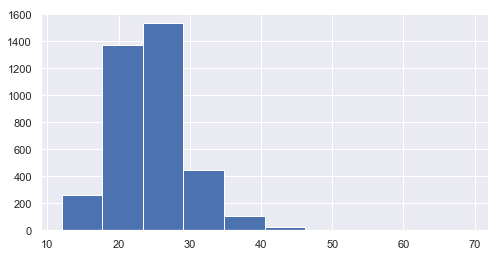

In [136]:
A_GM=merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Bronze')]['Age'].hist()
print('Mean age of bronze medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Bronze')]['Age'].mean())
print('Median age of bronze medalists-',merge_2DF_1[(merge_2DF_1['Sex']=='F') & (merge_2DF_1['Medal']=='Bronze')]['Age'].median())

In [ ]:
# stats/medals team - Russia

Count of Russia medalists- 366


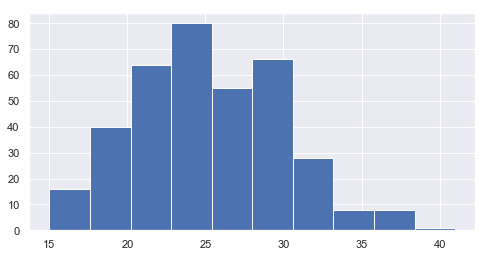

In [178]:
A_GM=merge_2DF_1[(merge_2DF_1['Team']=='Russia') & (merge_2DF_1['Medal']=='Gold')]['Age'].hist()
A_GM=merge_2DF_1[(merge_2DF_1['Team']=='Russia') & (merge_2DF_1['Medal']=='Gold')]['ID'].count()
print('Count of Russia gold medalists-',A_GM)

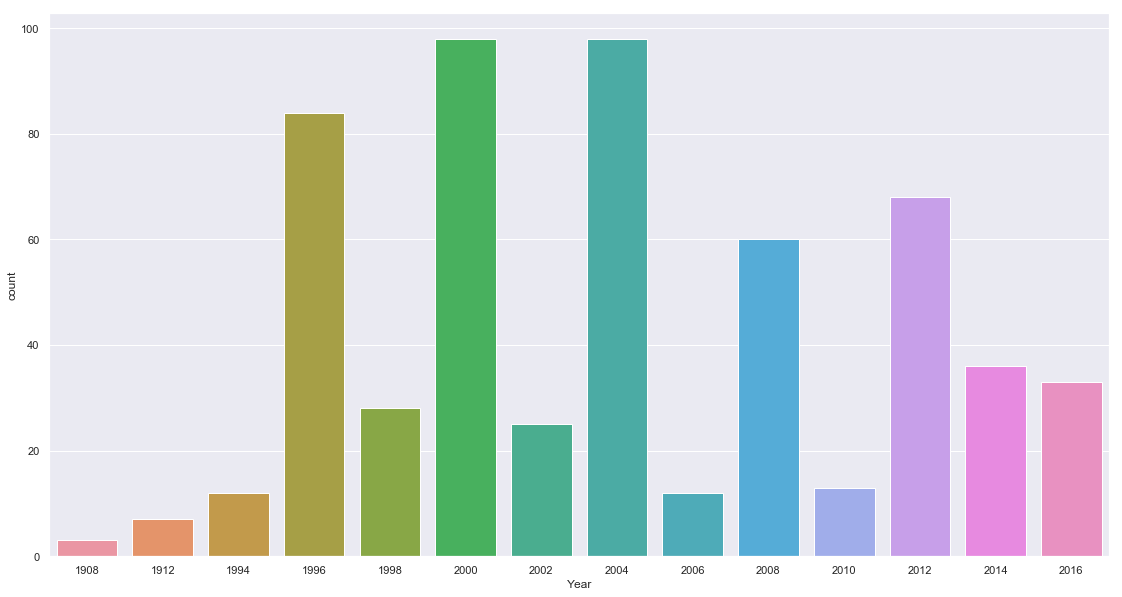

In [196]:
# trends
merge_2DF_1_M = merge_2DF_1[(merge_2DF_1.Sex == 'M') & (merge_2DF_1.Team == 'Russia')]
sns.countplot(x='Year', data=merge_2DF_1_M)

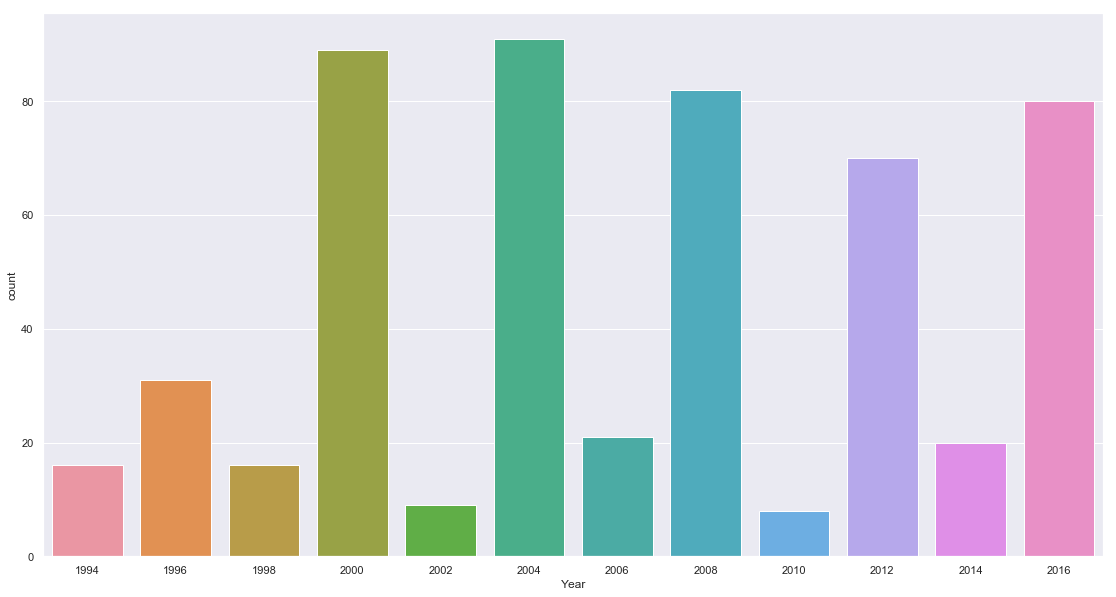

In [199]:
merge_2DF_1_F = merge_2DF_1[(merge_2DF_1.Sex == 'F') & (merge_2DF_1.Team == 'Russia')]
sns.countplot(x='Year', data=merge_2DF_1_F)

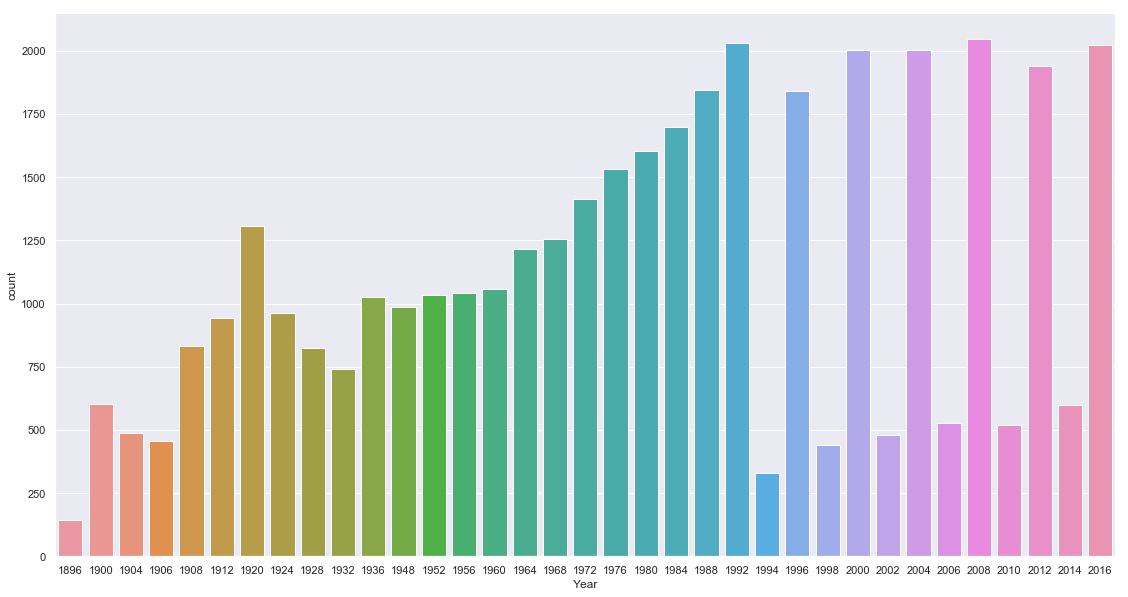

In [201]:
sns.countplot(x='Year', data=merge_2DF_1)